In [1]:
import numpy as np
from collections import Counter


from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [2]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [3]:
def print_pred(predictions):
    cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])
    m = ListedColormap(['#ffa500','#ffff00','#000080'])

    plt.figure()
    plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train, cmap=cmap, edgecolor='k', s=20)
    plt.scatter(X_test[:, 2], X_test[:, 3], c=predictions, cmap=m, edgecolor='k', s=20)
    plt.show()

In [4]:
def acc(predictions):
    acc = np.sum(predictions == y_test) / len(y_test)
    print(acc)

In [5]:
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

$$\sqrt{\left( x_{2} - x_{1} \right)^{2} + (y_{2} - y_{1})^{2}}

In [6]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]


In [7]:
clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

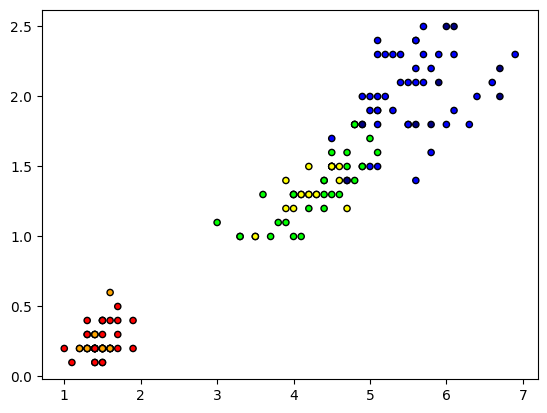

0.9666666666666667


In [8]:
print_pred(predictions)
acc(predictions)